In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "../datasets/mnist/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = mnist['data'], mnist['target']
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

rfc1 = RandomForestClassifier(n_estimators=20)
rfc1.fit(X_train, y_train)
accuracy_score(y_test, rfc1.predict(X_test))

0.95720000000000005

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_rtrain = pca.fit_transform(X_train)
X_rtest = pca.transform(X_test)

In [6]:
rfc2 = RandomForestClassifier(n_estimators=20)
rfc2.fit(X_rtrain, y_train)
accuracy_score(y_test, rfc2.predict(X_rtest))

0.92469999999999997

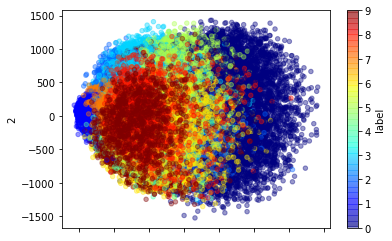

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA

#tsne = TSNE(n_components=2)
#X_reduced = tsne.fit_transform(X)
n_batches = 100
ipca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X, n_batches):
    ipca.partial_fit(X_batch)
X_reduced = ipca.transform(X)

mnist_r = pd.DataFrame({'1': X_reduced[:, 0], '2': X_reduced[:, 1], 'label': y})
mnist_r.plot(kind='scatter', x='1', y='2', alpha=0.4,
    c='label', cmap=plt.get_cmap('jet'), colorbar=True)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

mnist_r = pd.DataFrame({'1': X_reduced[:, 0], '2': X_reduced[:, 1], 'label': y})
mnist_r.plot(kind='scatter', x='1', y='2', alpha=0.4,
    c='label', cmap=plt.get_cmap('jet'), colorbar=True)

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_reduced = mds.fit_transform(X)

mnist_r = pd.DataFrame({'1': X_reduced[:, 0], '2': X_reduced[:, 1], 'label': y})
mnist_r.plot(kind='scatter', x='1', y='2', alpha=0.4,
    c='label', cmap=plt.get_cmap('jet'), colorbar=True)